# Problem: 
Create(predict) a  formation for a football team with the best 3  strikers out of 5 players if their statistics from  the previous matches are provided. 

Given is the  sample data of performance and rating in  previously 6 matches of each player.

In [1]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LinearRegression


In [2]:
dt=pd.read_csv('data/Players_data.csv')
dt.head()

,Player,Possesion%,Pass%,Goals,Shots,Rating
0,Silva,55,60,2,7,9
1,Deigo,54,64,0,6,5
2,Robert,57,77,2,6,10
3,Davies,49,75,1,5,7
4,Paul,54,65,0,6,6


We have 5 players and their previous performances  of 6 matches i.e. total 30 samples and 6 samples  for each player. We have all the ratings are  rounded off to non-decimal values that’s why we  will create a classifier along with regressor. But  we need to encode the player names before moving  forward 

In [3]:
Enc=LabelEncoder()
players=['Silva','Deigo','Robert','Davies','Paul']
Enc.fit(players)
dt['Player']=Enc.transform(dt['Player'])

Now let’s  move onto splitting where we will use the first  five matches data for training and the sixth match  for testing our models 

In [4]:
X=dt.drop(columns='Rating')
y=dt['Rating']
X_train=X[:25]
X_test=X[25:]
Y_train=y[:25]
Y_test=y[25:]
RegModel=LinearRegression()
CModel=DecisionTreeClassifier()
RegModel.fit(X_train,Y_train)
CModel.fit(X_train,Y_train)

DecisionTreeClassifier()

First of all we seperated the data into input i.e  the players along with their performance and the  output i.e. rating of each player. Then we  splitted the data into training and testing sets.  As mentioned earlier we will use the data of first  five matches (5 players in 5 matches {5*5=25}) and  the last match for testing which we did manually  using the slice syntax  Then we created our regressor RegModel and  classifier CModel and trained them with the first  five matches

Let’s pass the sixth match data and let the  models rate the players based on what they have  learnt. We can create a data frame to compare the  values 



In [5]:
pred_reg=RegModel.predict(X_test)
pred_cls=CModel.predict(X_test)

cmp= pd.DataFrame({'Regressor': pred_reg,
                   'Classifier':pred_cls,
                   'Actual':Y_test.values},
                  index=players)
cmp

,Regressor,Classifier,Actual
Silva,6.404661,7,7
Deigo,4.613903,5,5
Robert,4.158141,5,4
Davies,6.821053,7,7
Paul,4.160626,5,5


<AxesSubplot: >

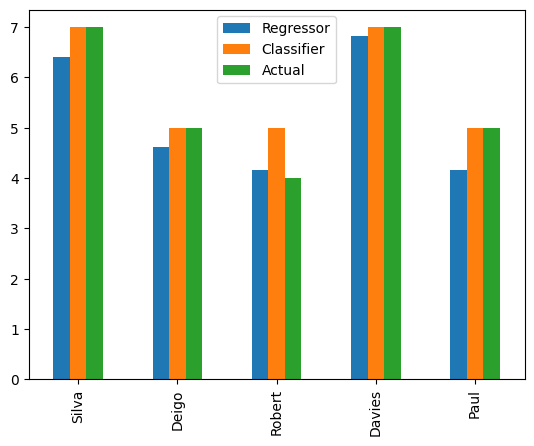

In [6]:
cmp.plot(kind='bar')

In [7]:
from sklearn import metrics

mae=metrics.mean_absolute_error(Y_test,pred_reg)
err=metrics.max_error(Y_test,pred_reg)
acc=metrics.accuracy_score(Y_test,pred_cls)
print('MAE:',mae,f'where max error is {err}')
print('CModel Accuracy:',acc)

MAE: 0.4315794018889466 where max error is 0.8393738119088532
CModel Accuracy: 0.8


So we can draw a conclusion that the regressor is  more close-to model i.e. close to the actual  values by 0.4 where it can double in worst cases  whereas the classifier is on-point model for the  correct predictions but if it predicts wrong the  values can differ from the actual by 1.0 or more. 



Continuing with regressor model, Let's predict the ratings of 5 players using Test dataset -

In [8]:
test_new=pd.read_csv('data/test_data.csv')
test_new

,Player,Possesion%,Pass%,Goals,Shots
0,Silva,52,57,1,5
1,Deigo,55,66,1,4
2,Robert,59,69,0,5
3,Davies,51,77,2,7
4,Paul,49,62,1,4


In [9]:

test_new['Player']=Enc.transform(test_new['Player'])
pred_y=RegModel.predict(test_new)

<AxesSubplot: >

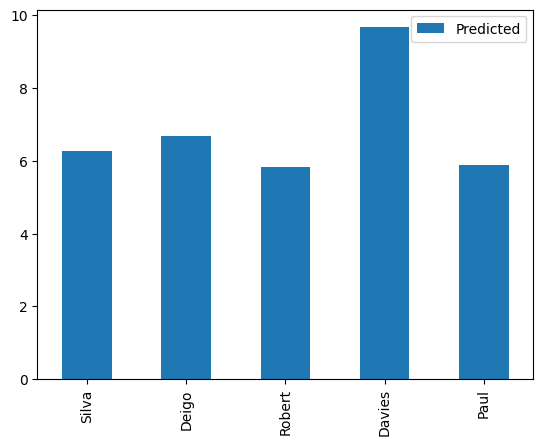

In [10]:
cmp= pd.DataFrame({'Predicted':pred_y},
                  index=players)
cmp.plot(kind='bar')

Top tree strikers as per the model: <br>
1. Davies
2. Deigo
3. Silva 